![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [ ]:
# Carga de librerías
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import os

In [ ]:
# Leer el dataset
df= pd.read_excel('../Dataset/BBDD_Hospitalización.xlsx')
df.info()
df.shape


In [ ]:
df = df.drop(df.index[-2:]) # Eliminar dos ultimos registros

In [ ]:
df.isna().sum().sort_values(ascending = False)

In [54]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols =2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [ ]:
df.select_dtypes('O').isna().sum().sort_values(ascending = False)

HOSPITALIZACION  -> Imputación por NO                                             5
BIOPSIAS PREVIAS -> Imputación por NO                                             4
VOLUMEN PROSTATICO  -> Imputación por NO                                          3
DIABETES -> Imputación por NO                                                     2
FIEBRE -> Imputación por NO                                                       2
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS ->  Imputación por Fluor                  2
BIOPSIA -> Imputación por Neg                                                     2
CUP -> Eliminación                                                                3
ENF. CRONICA PULMONAR OBSTRUCTIVA -> Eliminación                                  4
NUM DE DIAS POST BIOPSIA SE PRESENTA LA COMPLIC INFECCIOSA -> Eliminación         2
HOSPITALIZACIÓN ULTIMO MES -> Eliminación                                         2
ITU -> Eliminación                                                                2
AGENTE AISLADO -> Eliminación                                                     19
TIPO DE CULTIVO -> Eliminación                                                    2
PATRON DE RESISTENCIA -> Eliminación                                              2

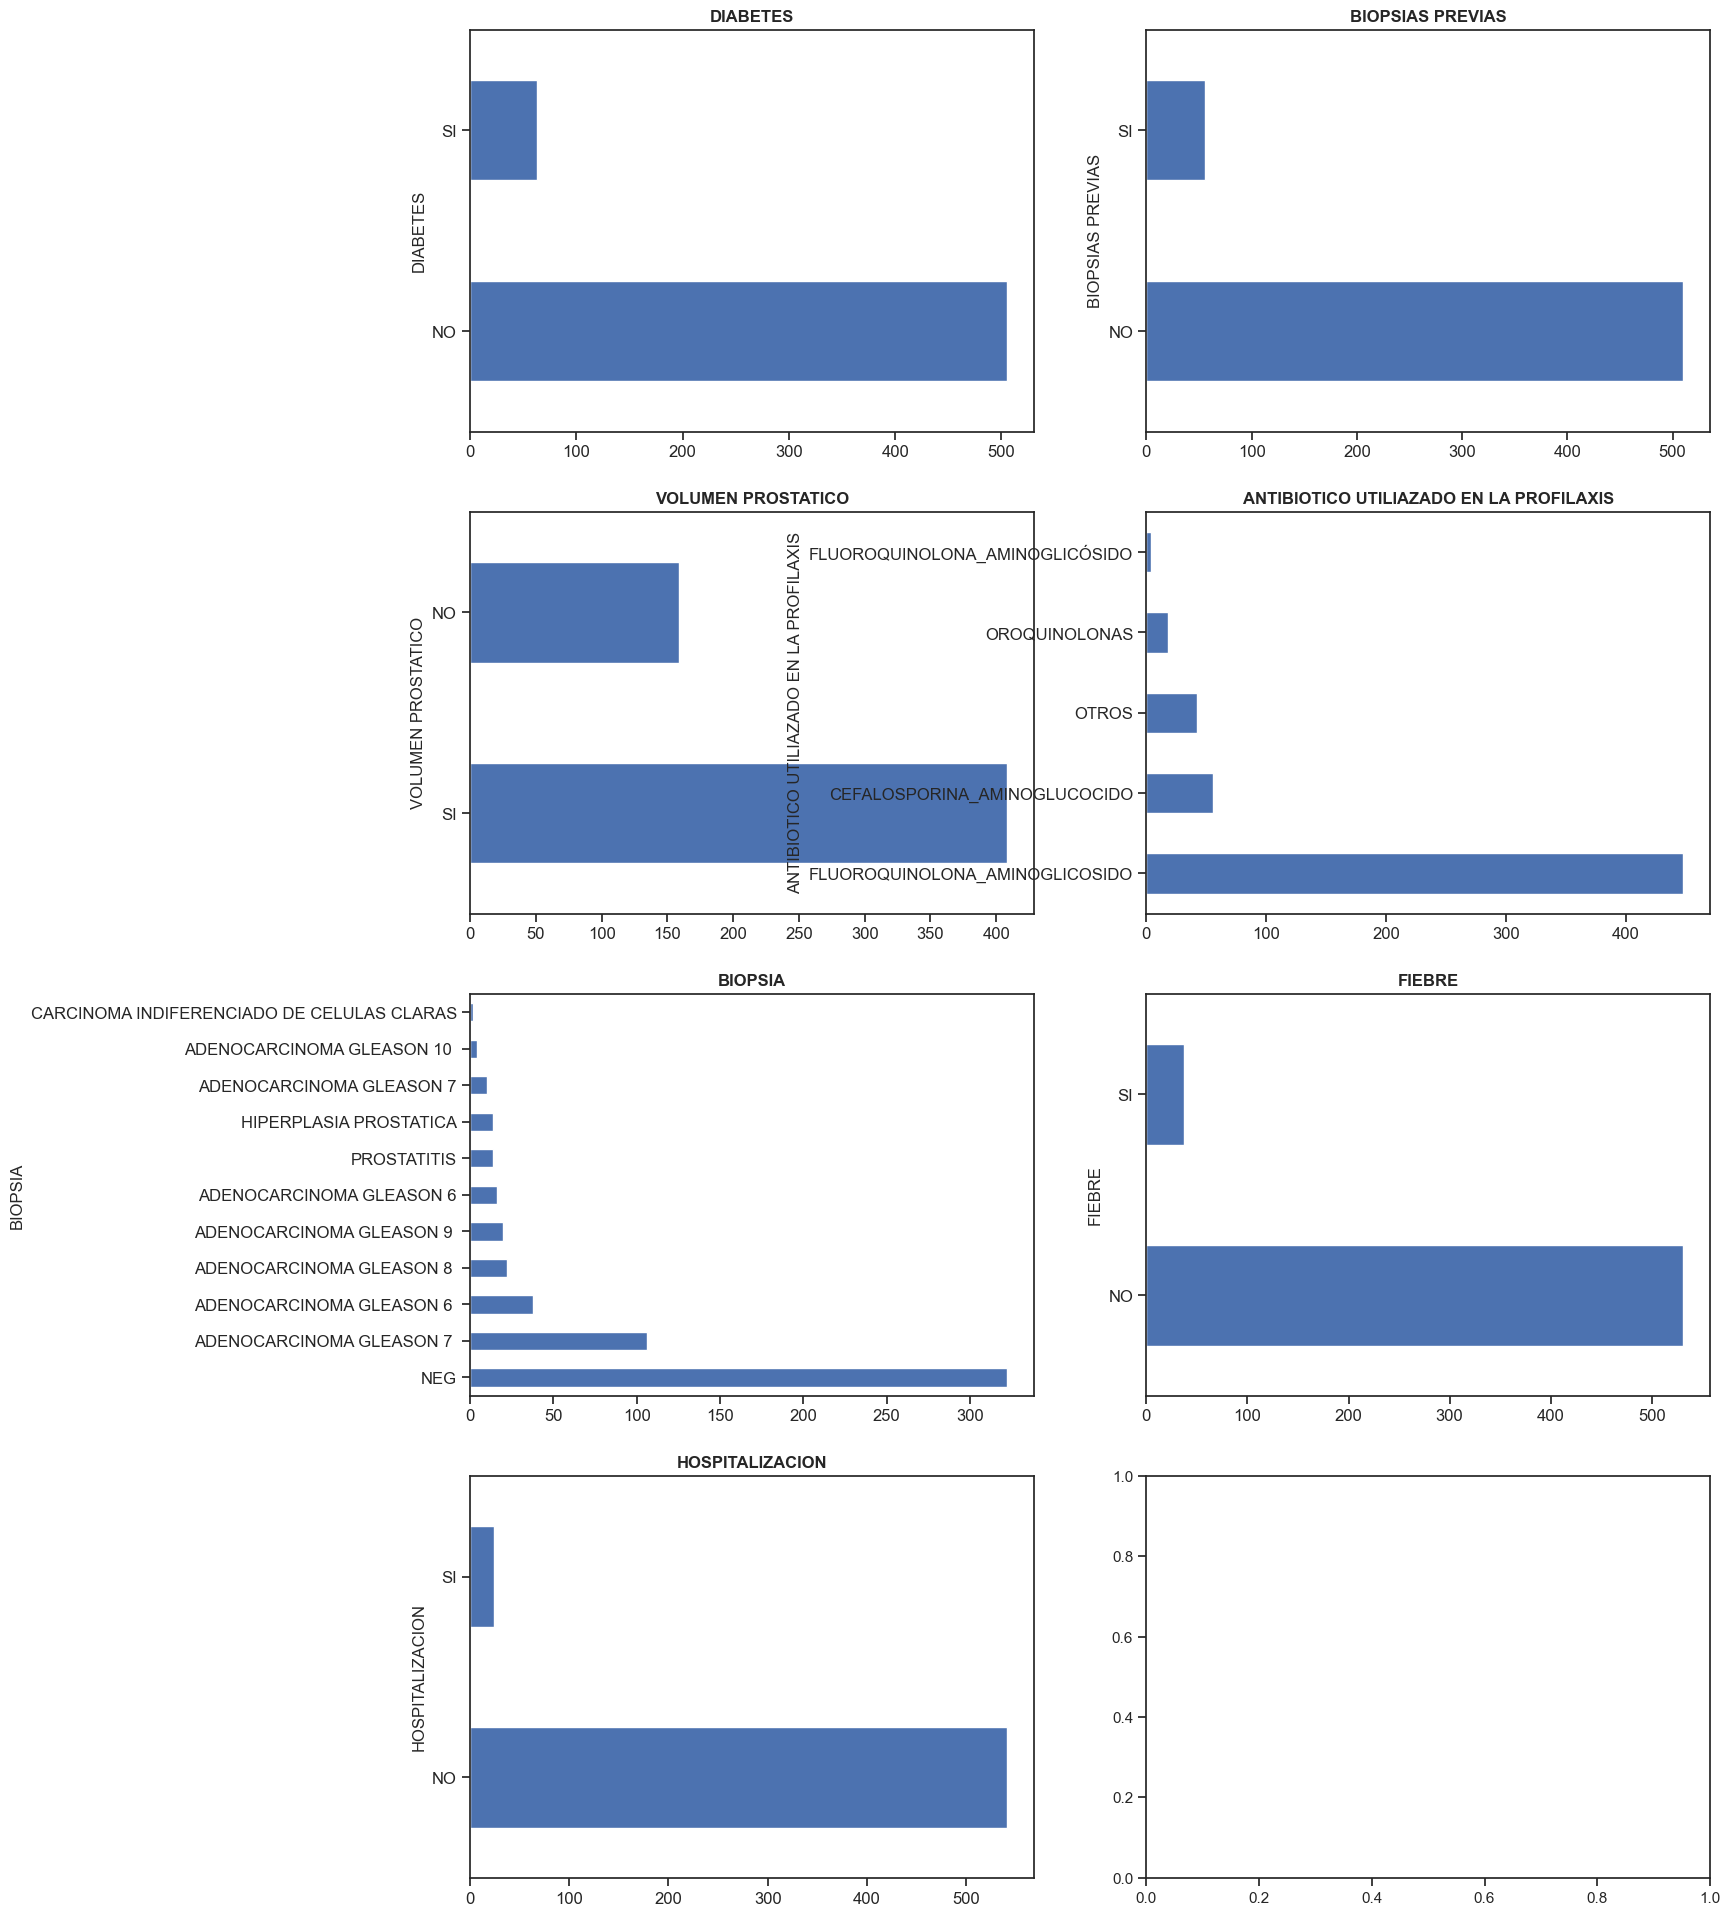

In [55]:
graficos_eda_categoricos(df.select_dtypes('O'))

In [ ]:
df.drop(columns =   [ 'CUP', 
                    'ENF. CRONICA PULMONAR OBSTRUCTIVA', 
                    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 
                    'HOSPITALIZACIÓN ULTIMO MES', 
                    'ITU', 
                    'AGENTE AISLADO', 
                    'TIPO DE CULTIVO', 
                    'PATRON DE RESISTENCIA'
                    ], inplace = True)
df

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

In [ ]:
df.select_dtypes('number').isna().sum().sort_values(ascending = False)

Conclusiones:
* DIAS HOSPITALIZACION MQ -> Eliminarla
* DIAS HOSPITALIZACIÓN UPC -> Eliminarla 
* PSA -> Imputar por la media

In [ ]:
graficos_eda_categoricos(df.select_dtypes('number'))

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

<function matplotlib.pyplot.show(close=None, block=None)>

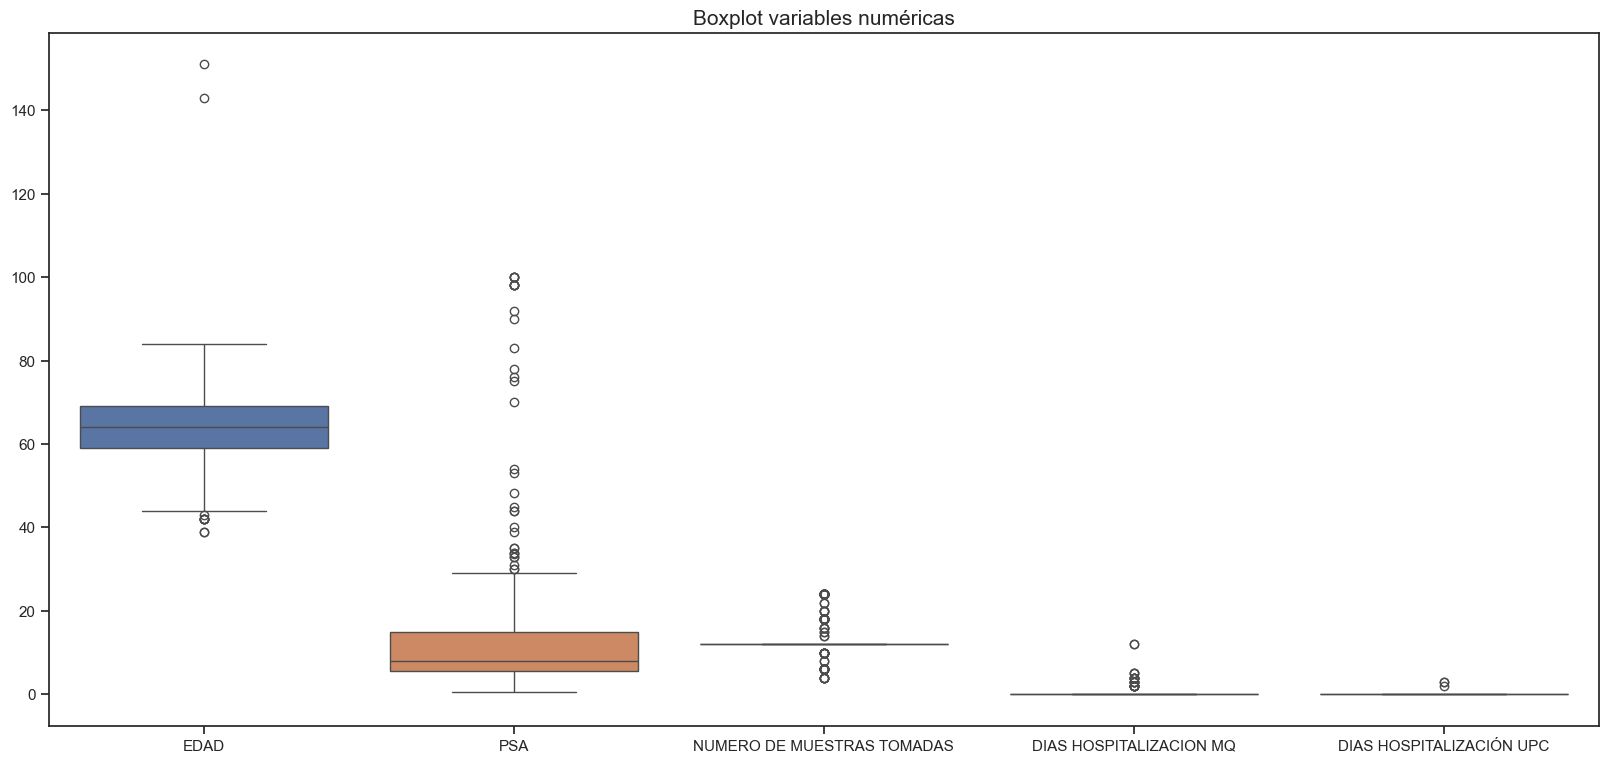

In [61]:

plt.figure(figsize = (20,9))
sns.boxplot(data=df.select_dtypes('number'))
plt.title('Boxplot variables numéricas', fontsize = 15)
plt.show

Conclusiones

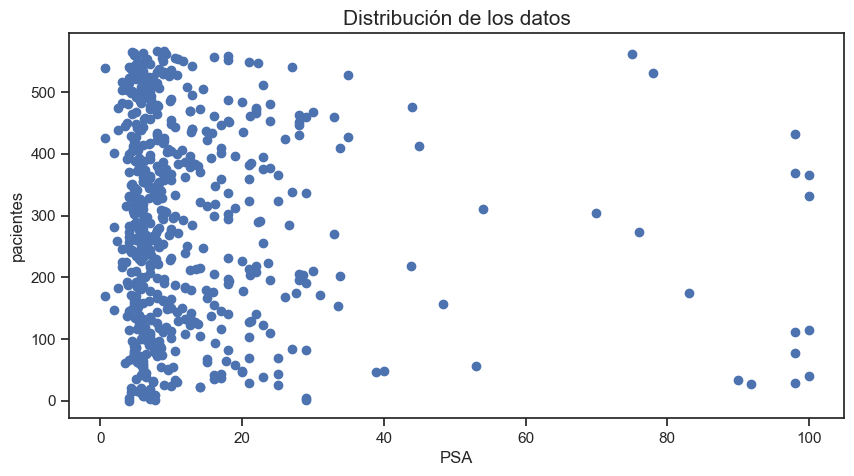

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(df['PSA'],df.index)
plt.title('Distribución de los datos', fontsize = 15)
plt.xlabel('PSA')
plt.ylabel('pacientes')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PSA'], df['EDAD'], color='blue', marker='o')
plt.title(f'Scatter Plot de {'PSA'} vs {'EDAD'}')
plt.xlabel('PSA')
plt.ylabel('EDAD')
plt.grid(True)
plt.show()

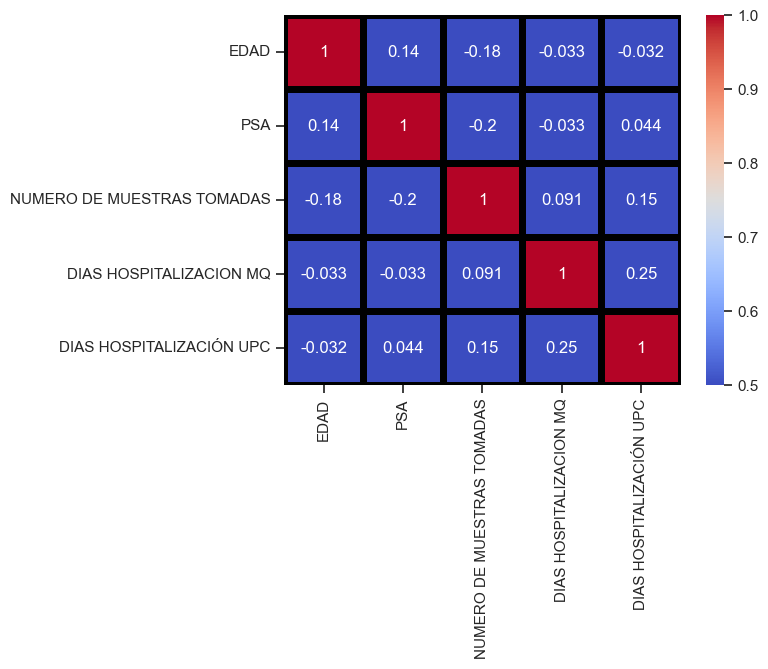

In [60]:
sns.heatmap(df.select_dtypes('number').corr(),
            annot=True,
            cmap='coolwarm',
            linewidths=5,
            linecolor='black',
            vmin=0.5,
            vmax=1,
            cbar=True)
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 